In [1]:
import torch
from torch import Tensor as tt

from matplotlib import pyplot as plt

In [2]:
weights_true = tt([1,2,3]) # 真値は y = 1 +2*x_1 + 3*x_2

sample_number =100 # 標本数
learning_rate = 0.1 # 学習率
epoch_number = 100 # エポック数

matrix = torch.randn([sample_number, 2]) # x1, x2 の値をランダムに生成
vector = torch.ones([sample_number, 1]) # 切片のための1だけの列の項

X = torch.cat([vector, matrix], 1) # 2つを結合

# weights の予測値。初期値は乱数で与えておく。自動微分出来るように"requires_grad=True"
weights_estimated = torch.randn(3, requires_grad=True)

In [3]:
noise = torch.randn(sample_number)*0.5 # 3列のN(0,1)に従う乱数

observed_value = torch.mv(X, weights_true) + noise # 標本数の観測値を生成

In [ ]:
losses = [] # 損失関数のログ

for i in range(epoch_number):
    # 勾配を初期化しておく(iterationで残ってほしくない)
    weights_estimated.grad = None
     
    # 予測値を計算
    predicted_value = torch.mv(X, weights_estimated)
    
    # ロスを計算、ログに加える
    loss = torch.mean((observed_value - predicted_value)**2)
    loss.backward() # 微分を実行
    losses.append(loss.item())
    
    # 係数の推定値を更新
    weights_estimated.data = weights_estimated.data - learning_rate * weights_estimated.grad.data
    

In [ ]:
# lossをプロット
plt.plot(losses)

In [ ]:
weights_estimated.data

真値[1,2,3]と比べていい感じに推定できてるよね

## nn, optimでもっと簡単にする

In [4]:
from torch import nn, optim

In [5]:
# linear層を宣言(biasがFalseなのは切片が回帰係数に含まれているから)
net = nn.Linear(in_features=3, out_features=1, bias=False)

# ネットワークのパラメータをoptimizerに渡す
optimizer = optim.SGD(net.parameters(), lr=0.1)

# 損失関数をnnのクラスを使って宣言
loss_function = nn.MSELoss()

In [6]:
losses = []

for epoch in range(epoch_number):
    # 勾配の計算を初期化
    optimizer.zero_grad()
    
    # 予測値を計算
    predicted_value = net(X)
    
    # MSE lossを計算
    loss = loss_function(predicted_value.view_as(observed_value), observed_value)
    
    # lossのw(回帰係数の推定値)による微分を計算
    loss.backward()
    
    # 勾配を更新
    optimizer.step()
    
    # lossの値をリストに追加
    losses.append(loss.item())
    

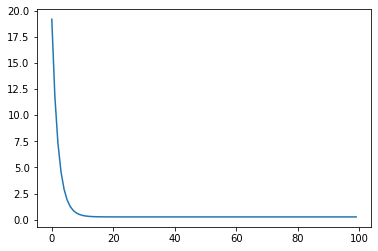

In [7]:
# lossをプロット
plt.plot(losses)

推定されたパラメータを確認

In [13]:
list(net.parameters())

[Parameter containing:
 tensor([[1.0394, 2.0019, 2.9804]], requires_grad=True)]

In [18]:
dict(net.named_parameters())

{'weight': Parameter containing:
 tensor([[1.0394, 2.0019, 2.9804]], requires_grad=True)}

In [26]:
# numpy arrayにする方法の一例
import numpy as np
dict(net.named_parameters())["weight"].detach().numpy()

array([[1.0394436, 2.001924 , 2.9803553]], dtype=float32)